## 1.Preguntar

## 1.2 Definición del Problema o Pregunta de Negocio:

La empresa Bellabeat busca utilizar las tendecias de uso en dispositivos inteligentes que no son de BellaBeat y utilzarlos en uno de sus productos para aplicar dichas tendecias en sus clientes

## 2.Preparar

## 2.1 Datos utilizados y credibilidad

Los datos proporcionados fueron los datos de FitBit Tracker. Tiene licencia CC0: Dominio público y se puede encontrar en Kaggle, lo que demuestra que los datos tienen buena reputación y el público puede acceder a ellos. La carpeta consta de 18 archivos csv, 15 de formato largo y 3 de ancho. Los conjuntos de datos contienen datos de 30 usuarios de Fitbit durante un período de 1 mes, y realizan un seguimiento personal de aspectos como sus pasos diarios, la cantidad de sueño, los minutos de actividad, etc.

## 2.2 Problemas con los datos

No se revela ningún género en este conjunto de datos, lo cual es crucial ya que Bellabeat es una empresa centrada en las mujeres. Otras piezas clave de información que faltan incluyen las edades de los usuarios, la región donde se recopilaron los datos y cosas como el clima. El tamaño de la muestra es pequeño, con solo 30 personas, y el período de recopilación de datos es demasiado corto, ya que 1 mes es poco tiempo para sacar conclusiones que se supone son a largo plazo.

## 3.Procesar

Usaré R para completar el análisis y la visualización de este proyecto ya que algunos de los archivos son demasiado grandes para usar Excel.

vamos a instalar los paquetes y sus librerias

In [1]:
library(skimr)
library(janitor)
library(lubridate)
library(tidyverse)
library(ggplot2)
library(dplyr)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.4.4     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


importacion de los archivos csv

In [2]:

Daily_Activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Daily_Calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
Daily_Intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
Daily_Steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
Hourly_Calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
Hourly_Steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
Hourly_Intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
Sleep_Day <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
Weight<- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


una vista rapida de los conjuntos datos

In [3]:

head(Weight)
head(Daily_Activity)
head(Daily_Calories )
head(Daily_Intensities )
head(Daily_Steps )
head(Sleep_Day  )
head(Hourly_Intensities)
head(Hourly_Steps)


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


## 4.Limpieza de Datos

Se supone que los datos de Fitbit tienen 30 usuarios, por lo que para garantizar esto verificaré la cantidad de identificaciones distintas en cada marco de datos.

In [4]:

n_distinct(Daily_Activity$Id)
n_distinct(Daily_Calories $Id)
n_distinct(Daily_Intensities $Id)
n_distinct(Daily_Steps $Id)
n_distinct(Sleep_Day  $Id)
n_distinct(Hourly_Intensities$Id)
n_distinct(Hourly_Steps$Id)
n_distinct(Weight$Id)



[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

[1] 33

[1] 8

Hay 33 participantes en los conjuntos de datos de actividad, calorías e intensidades, 24 en el sueño y solo 8 en el conjunto de datos de peso. 8 participantes no es significativo para hacer recomendaciones y conclusiones basadas en estos datos.

quiero verificar la estrcutra de los conjuntos de datos para ver los formatos de cada columna

In [5]:

str(Daily_Activity)
str(Daily_Calories)
str(Daily_Intensities)
str(Daily_Steps)
str(Hourly_Calories)
str(Hourly_Steps)
str(Hourly_Intensities)
str(Sleep_Day)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

encuentro algunos problemas en la marca de tiempo. Entonces,necesito convertirlo al formato de fecha y hora y dividirlo en fecha y hora.

In [6]:

# daily activity
Daily_Activity$ActivityDate=as.POSIXct(Daily_Activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
Daily_Activity$date <- format(Daily_Activity$ActivityDate, format = "%m/%d/%y")
# daily calories
Daily_Calories <- rename(Daily_Calories, date=ActivityDay)
# daily intensities
Daily_Intensities <- rename(Daily_Intensities, date=ActivityDay)
# daily steps
Daily_Steps <- rename(Daily_Steps, date=ActivityDay)
# hourly calories
Hourly_Calories$ActivityHour=as.POSIXct(Hourly_Calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Hourly_Calories$time <- format(Hourly_Calories$ActivityHour, format = "%H:%M:%S")
Hourly_Calories$date <- format(Hourly_Calories$ActivityHour, format = "%m/%d/%y")
# hourly steps
Hourly_Steps$ActivityHour=as.POSIXct(Hourly_Steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Hourly_Steps$time <- format(Hourly_Steps$ActivityHour, format = "%H:%M:%S")
Hourly_Steps$date <- format(Hourly_Steps$ActivityHour, format = "%m/%d/%y")
# hourly intensities
Hourly_Intensities$ActivityHour=as.POSIXct(Hourly_Intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Hourly_Intensities$time <- format(Hourly_Intensities$ActivityHour, format = "%H:%M:%S")
Hourly_Intensities$date <- format(Hourly_Intensities$ActivityHour, format = "%y/%m/%d")
# sleep
Sleep_Day$SleepDay=as.POSIXct(Sleep_Day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Sleep_Day$date <- format(Sleep_Day$SleepDay, format = "%m/%d/%y")




veremos el resumen


In [7]:

# activity
Daily_Activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore num of active minutes per category
Daily_Activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
Daily_Calories%>%
  select(Calories) %>%
  summary()
# sleep
Sleep_Day %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

listo ahora procedemos a fusionar dos conjutos de datos por el id y fecha

In [8]:

merged_data <- merge(Sleep_Day, Daily_Activity , by=c('Id', 'date'))
head(merged_data)


,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


## 5.Visualizaciones

`geom_smooth()` using formula = 'y ~ x'


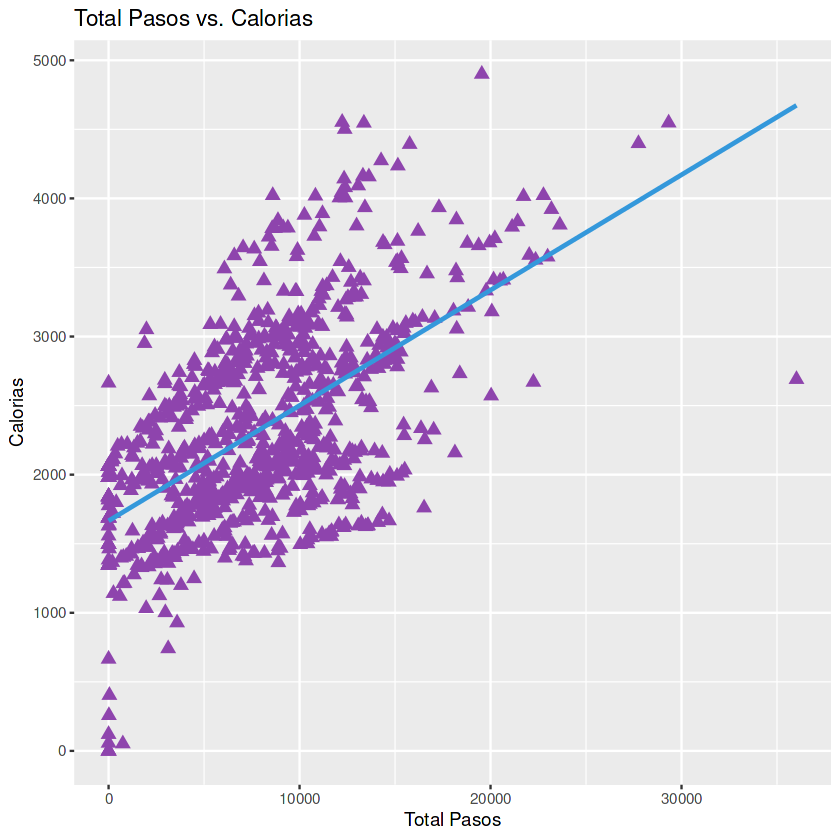

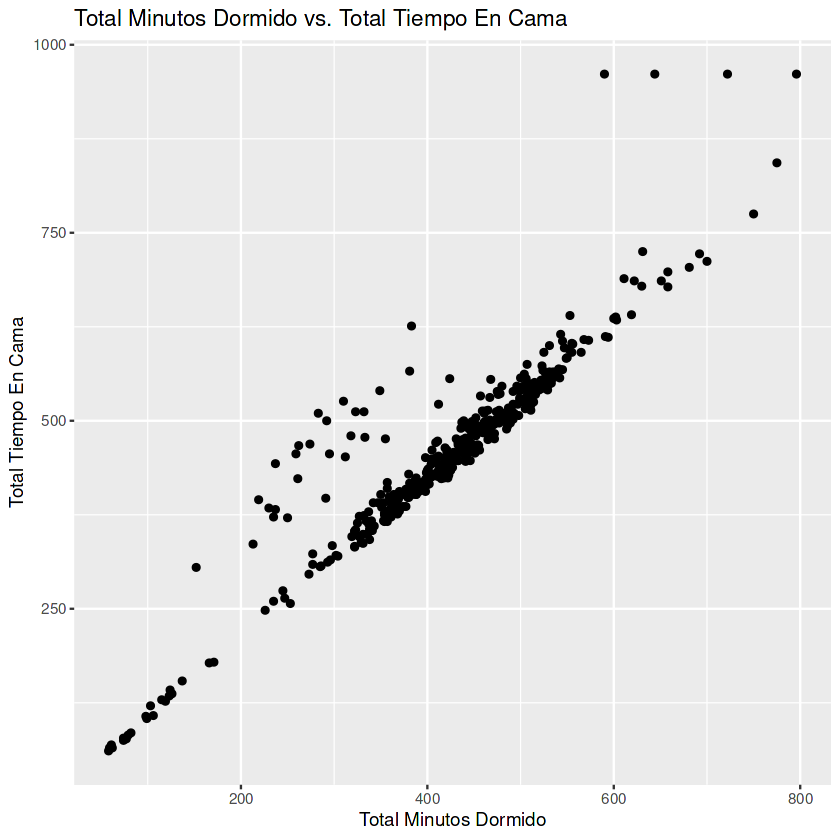

In [9]:
ggplot(data=Daily_Activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point(shape = 17, size = 3, color = '#8e44ad') + geom_smooth(method = "lm", se = FALSE, color = '#3498db') +   labs(title = "Total Pasos vs. Calorias",
       x = "Total Pasos",
       y = "Calorias")

ggplot(data = Sleep_Day, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
  geom_point()+ labs(title = "Total Minutos Dormido vs. Total Tiempo En Cama",
       x = "Total Minutos Dormido",
       y = "Total Tiempo En Cama")
  

ahora creo una variable nueva agrupada por el tiempo

In [10]:

 int_new <- Hourly_Intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))


## Y visualizamos

`geom_smooth()` using formula = 'y ~ x'


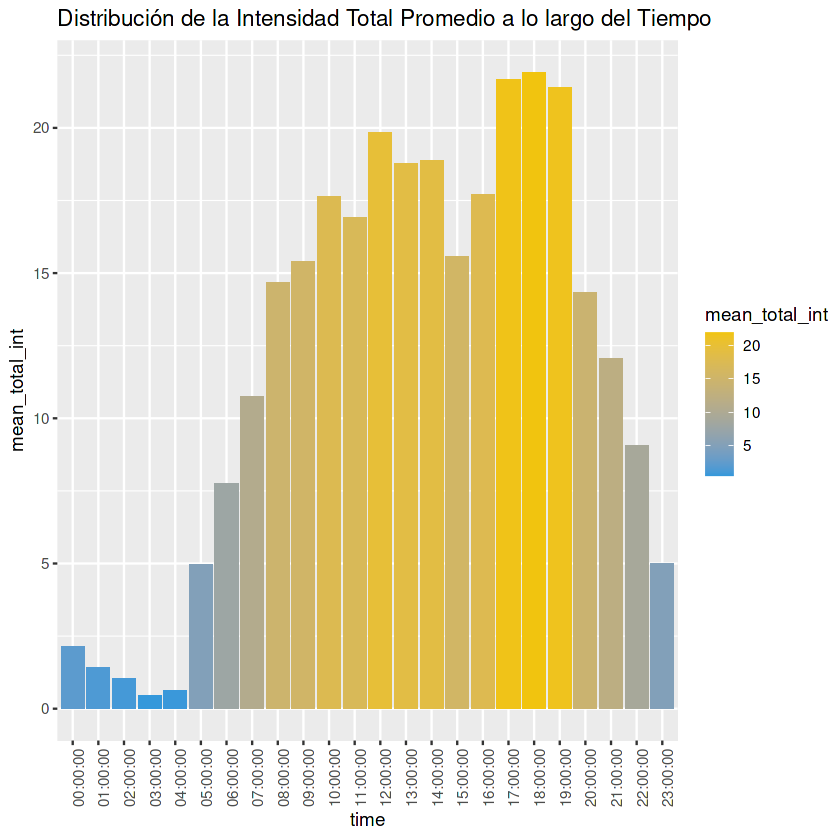

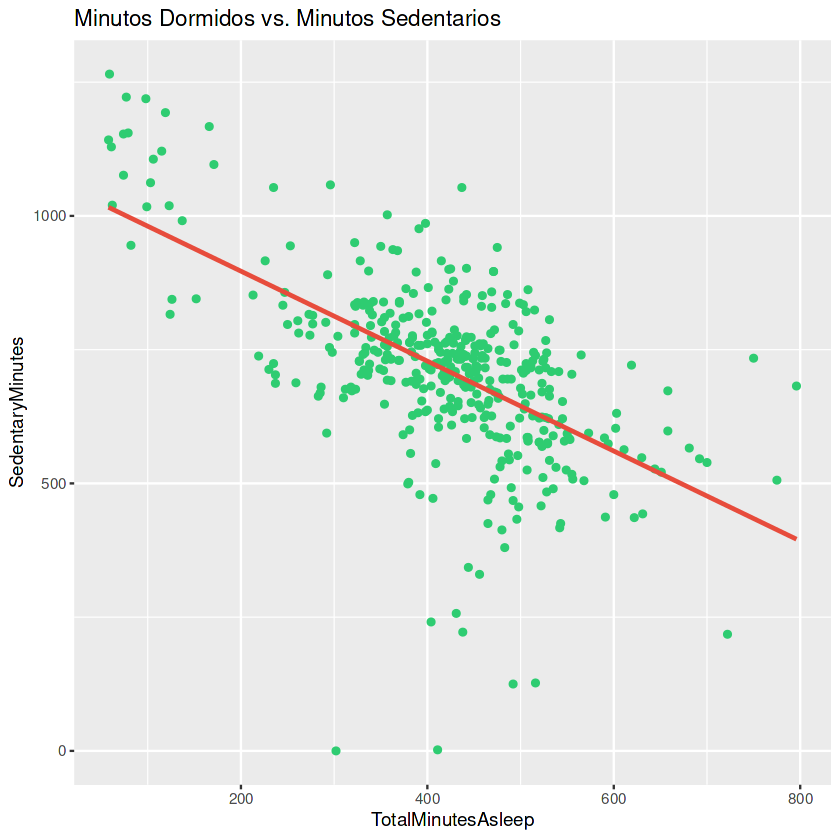

In [11]:

ggplot(data = int_new, aes(x = time, y = mean_total_int, fill = mean_total_int)) +
  geom_bar(stat = "identity") +
  scale_fill_gradient(low = "#3498db", high = "#f1c40f") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Distribución de la Intensidad Total Promedio a lo largo del Tiempo")

  
  ggplot(data = merged_data, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) +
  geom_point(color = '#2ecc71') +  # Verde suave
  geom_smooth(method = "lm", se = FALSE, color = '#e74c3c') +  # Rojo suave
  labs(title = "Minutos Dormidos vs. Minutos Sedentarios",)


## 6. Hallazgos clave y fase de acción

Estos datos proporcionaron información valiosa que se puede utilizar para desarrollar una estrategia de marketing en torno a la aplicación Bellabeat. A continuación se presentan algunas de esas ideas:

-Existe una correlación positiva entre las calorías y los pasos totales. Cuantos más pasos se dan, más calorías se queman.

-La mayoría de usuarios no dan suficientes pasos para ser considerados activos.

-El promedio de pasos totales por día es 7638, lo cual es un poco menos para tener beneficios para la salud según la investigación de los CDC. Descubrieron que dar 8.000 pasos por día se asociaba con un riesgo 51% menor de mortalidad por todas las causas (o muerte por todas las causas). Dar 12.000 pasos por día se asoció con un riesgo un 65% menor en comparación con dar 4.000 pasos.

### 6.1 recomendaciones basadas en el análisis

-Bellabeat podria implementar en sus dispotivos notificaciones y retos para la quema de calorias como poner tiempo para caminar metas diaras que cumplir.

-poner recordatorios y alertas con colores de advertencia para el uso de conciencia, de que no estan dando el promedio de pasos recomendados que segun la investigacion es recomendo mas de 8000 pasos y que a mayor pasos reduce la tasa de mortalidad.

-La mayor parte de la actividad ocurre entre las 5 pm y las 7 pm; supongo que la gente va al gimnasio o da un paseo después de terminar el trabajo. Bellabeat puede aprovechar este tiempo para recordar y motivar a los usuarios a salir a correr o caminar.
